# Ground State Silicon

### Muffin Tin Radius Determination

In [9]:
import os

import numpy as np

al = 10.2612128567   # In Bohr
bond_length = np.sqrt(3) * 0.25 * al

# MT radius: Start with 1/2 bond length. Touching spheres corresponds to scaling = 1.0
scaling = 0.9
radius_mt_max = scaling * 0.5 * bond_length

print(bond_length)
print(radius_mt_max)

4.443235503770845
1.9994559766968802


### Initial Input and Basis with Reasonable Settings

**input.xml**
```
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>silicon-primitive-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="10.2612128567">
         <basevect>0.00000000   0.50000000   0.50000000 </basevect>
         <basevect>0.50000000   0.00000000   0.50000000</basevect>
         <basevect>0.50000000   0.50000000   0.00000000</basevect>
      </crystal>

      <species speciesfile="Si.xml" rmt="2.00">
        <atom coord="0.00 0.00 0.00"></atom>
	    <atom coord="0.25 0.25 0.25"></atom>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="6.0"            # Reasonable
      ngridk="8 8 8"          # Converged
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="20.0"
      lorecommendation="false"
      >
   </groundstate>

   <properties>
    <chargedensityplot>
    <plot1d>
    <path steps="100">
               <point coord="0.00 0.00 0.00"/>
               <point coord="0.25 0.25 0.25"/>
    </path>
    </plot1d>
    </chargedensityplot>
   </properties>

</input>
```

**Si.xml**
* rtmin starts closer to the nucleus, and the mesh points is dense.

```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
    <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>
      <custom l="0" type="apw+lo" trialEnergy="0.1500" searchE="true"/>
      <custom l="1" type="apw+lo" trialEnergy="0.1500" searchE="true"/>
    </basis>
  </sp>
</spdb>
```


/Users/alexanderbuccheri/Python/pycharm_projects/wp_benchmarks/groundstate
Radial position where the charge density is a minimum: 2.199177169 bohr


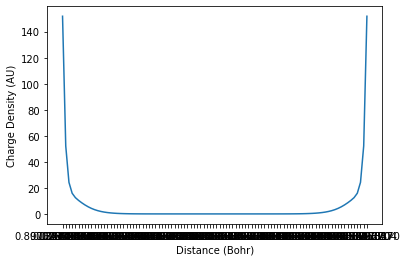

In [11]:
### Point at Which 1D Charge Density is a Minimum

import matplotlib.pyplot as plt
from excitingtools.exciting_dict_parsers.properties_parser import parse_charge_density

x, y = parse_charge_density('silicon/RHO1D.xml')
index = np.argmin(y)

print(f"Radial position where the charge density is a minimum: {x[index]} bohr")

plt.xlabel("Distance (Bohr)")
plt.ylabel("Charge Density (AU)")
# Ignore close to the atoms as the density is so large
plt.plot(x[2:-2], y[2:-2])
plt.show()

Radial position where the charge density is a minimum: 2.199 bohr
This suggests that my initial guess of 1.99 Bohr can be increased to 2.199 Bohr, which is close to nearly-touching spheres (0.5 * bond length = 2.22 Bohr).

### Get an Optimal Default (ground state) Basis

* Use the optimal MT radius of 2.199 Bohr
* rgkmax is reasonable
* Added a bunch of lapws to the basis, allow them to search, and extract optimal energies from LINENGY.OUT

**input.xml**
```
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>silicon-primitive-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="10.2612128567">
         <basevect>0.00000000   0.50000000   0.50000000 </basevect>
         <basevect>0.50000000   0.00000000   0.50000000</basevect>
         <basevect>0.50000000   0.50000000   0.00000000</basevect>
      </crystal>

      <species speciesfile="Si.xml" rmt="2.199">
        <atom coord="0.00 0.00 0.00"></atom>
	    <atom coord="0.25 0.25 0.25"></atom>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="6.0"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="20.0"
      lorecommendation="false"
      >
   </groundstate>

   <properties>
    <chargedensityplot>
    <plot1d>
    <path steps="100">
               <point coord="0.00 0.00 0.00"/>
               <point coord="0.25 0.25 0.25"/>
    </path>
    </plot1d>
    </chargedensityplot>
   </properties>

</input>
```

**Si.xml**
THE INITIAL BASIS I USED

```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
  <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>

      <custom l="0" type="lapw" trialEnergy="0.1500" searchE="true"/>
      <lo l="0">
        <wf matchingOrder="0" trialEnergy="-0.5" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="-0.5" searchE="true"/>
      </lo>
      <lo l="0">
        <wf matchingOrder="1" trialEnergy="-0.5" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="-0.5" searchE="true"/>
      </lo>

      <custom l="1" type="lapw" trialEnergy="0.1" searchE="true"/>
      <lo l="1">
        <wf matchingOrder="0" trialEnergy="0.1" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="0.1" searchE="true"/>
      </lo>
      <lo l="1">
        <wf matchingOrder="1" trialEnergy="0.1" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="0.1" searchE="true"/>
      </lo>

      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="2">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

      <custom l="3" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="3">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="3">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

      <custom l="4" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="4">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="4">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

      <custom l="5" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="5">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
      </lo>

      <lo l="5">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="true"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="true"/>
      </lo>

  </basis>
  </sp>
</spdb>
```

* THIS IS THE OPTIMAL BASIS I Defined according to LINENERGY VALUES

```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
  <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>

      <custom l="0" type="lapw" trialEnergy="0.1500" searchE="true"/>
      <lo l="0">
        <wf matchingOrder="0" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>
      <lo l="0">
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>

      <custom l="1" type="lapw" trialEnergy="0.1" searchE="true"/>
      <lo l="1">
        <wf matchingOrder="0" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
      </lo>
      <lo l="1">
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="0.1975000000" searchE="false"/>
      </lo>

      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="2">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="3" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="3">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="3">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="4" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="4">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="4">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="5" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="5">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="5">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

    </basis>
  </sp>
</spdb>
```

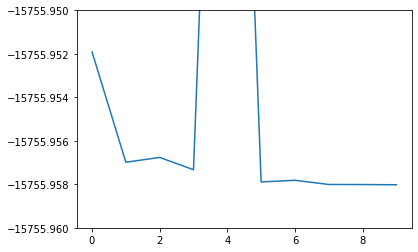

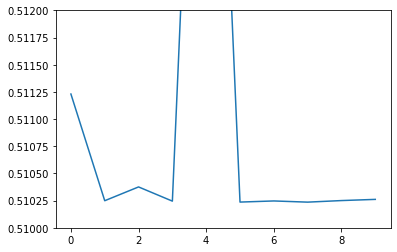

In [9]:
# NOTE! I used converged inputs to do this. FLAG THIS UPPPP

input ="""
   <groundstate
      do="fromscratch"
      rgkmax="10.0"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="30.0"
      lorecommendation="false"
      >
   </groundstate>

"""

import matplotlib.pyplot as plt
import numpy as np
# Check convergence as I add each LO to the LAPW channels for a) the GAP and b) the total energy.
# Remove the LAPWs as well.
ha_to_ev = 27.2114

plt.rcParams['axes.formatter.useoffset'] = False

#  Max LO (and APW)
labels = ['l=0(0,1)', 'l=0(1,2)', 'l=1(0,1)', 'l=1(1,2)', 'l=2(0,1)', 'l=2(1,2)', 'l=3(0,1)', 'l=3(1,2)', 'l=4(0,1)', 'l=4(1,2)']
est_fundamental_gap = [0.01878736, 0.01875130, 0.01875596, 0.01875116, 0.01901496, 0.01875084, 0.01875122, 0.01875082, 0.01875135, 0.01875175]
total_energy = [-579.02026038, -579.02044677, -579.02043863, -579.02045937, -579.01895492, -579.02047999, -579.02047729, -579.02048432, -579.02048446, -579.02048482]
indices = np.arange(0, len(total_energy))
plt.ylim(-15755.96, -15755.95)
plt.plot(indices, [x * ha_to_ev for x in total_energy])
plt.show()
plt.ylim(0.510, 0.512)
plt.plot(indices, [x * ha_to_ev for x in est_fundamental_gap])
plt.show()

## Optimal Basis W.r.t. LAPW+LOs

Ignoring that weird spike when I add the:

```
      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>
```



```
<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Si" name="silicon" z="-14.0000" mass="51196.73454">
    <muffinTin rmin="0.100000E-05" radius="2.0000" rinf="24.9760" radialmeshPoints="600"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="1.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="1.00000" core="false"/>
  <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="false"/>

      <custom l="0" type="lapw" trialEnergy="0.1500" searchE="true"/>
      <lo l="0">
        <wf matchingOrder="0" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>
      <lo l="0">
        <wf matchingOrder="1" trialEnergy="-0.1850000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="-0.1850000000" searchE="false"/>
      </lo>

      <custom l="1" type="lapw" trialEnergy="0.1" searchE="true"/>
      <lo l="1">
        <wf matchingOrder="0" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
      </lo>
      <lo l="1">
        <wf matchingOrder="1" trialEnergy="0.1975000000" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="0.1975000000" searchE="false"/>
      </lo>

      <custom l="2" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="2">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="2">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

      <custom l="3" type="lapw" trialEnergy="1.0" searchE="true"/>
      <lo l="3">
        <wf matchingOrder="0" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
      </lo>

      <lo l="3">
        <wf matchingOrder="1" trialEnergy="1.0" searchE="false"/>
        <wf matchingOrder="2" trialEnergy="1.0" searchE="false"/>
      </lo>

    </basis>
  </sp>
</spdb>
```

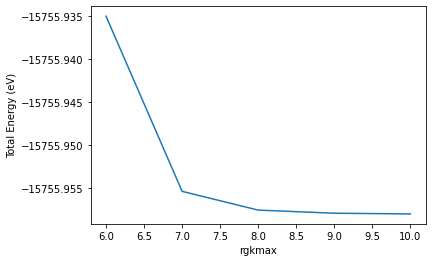

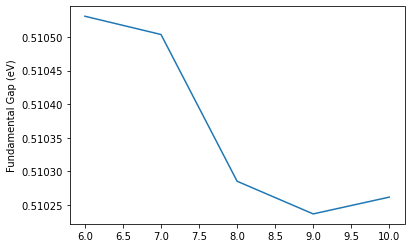

In [12]:
import matplotlib.pyplot as plt
# Converge total energy and the gap w.r.t. rgkmax
ha_to_ev = 27.2114

gmaxvr = [30., 30., 30., 30., 30.]
rgkmax = [6, 7, 8, 9, 10]
est_fundamental_gap = [0.01876166, 0.01876066, 0.01875262, 0.01875083, 0.01875175]
total_energy = [-579.01964075, -579.02038853, -579.02046855, -579.02048184, -579.02048482]

plt.xlabel("rgkmax")
plt.ylabel("Total Energy (eV)")
plt.plot(rgkmax, [x * ha_to_ev for x in total_energy])
plt.show()

plt.ylabel("Fundamental Gap (eV)")
plt.plot(rgkmax, [x * ha_to_ev for x in est_fundamental_gap])
plt.show()

details = """
0.44 eV difference in the total energy between rgkmax = 8 and 10.
Less than 0.05 meV difference in the fundamental gap between rgkmax = 8 and 10.
"""
print(details)

# Reduce gmaxvr from 30 to 24 for rgkmax = 8 gives -579.02046855 and 0.01875262
# Number is identical, so stick with 24

# Final Input

```xml
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>silicon-primitive-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="10.2612128567">
         <basevect>0.00000000   0.50000000   0.50000000 </basevect>
         <basevect>0.50000000   0.00000000   0.50000000</basevect>
         <basevect>0.50000000   0.50000000   0.00000000</basevect>
      </crystal>

      <species speciesfile="Si.xml" rmt="2.199">
        <atom coord="0.00 0.00 0.00"/>
	    <atom coord="0.25 0.25 0.25"/>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="8.0"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="24.0"
      lorecommendation="false"
      >
   </groundstate>

</input>
```

# Band structure File Generation

In [1]:
"""
Use ASE to get the High symmetry points and drop them into exciting band path format.
"""
import numpy as np

from src.parsers import get_standardised_band_path, exciting_band_path_xml

al_angstrom = 5.43
lattice = al_angstrom * np.array([[0.0, 0.5, 0.5],
                                  [0.5, 0.0, 0.5],
                                  [0.5, 0.5, 0.0]])

symbolic_path, high_symmetry_points = get_standardised_band_path(lattice)
print(symbolic_path)

band_string = exciting_band_path_xml(symbolic_path, high_symmetry_points)
print(band_string)

# lat = HEX(a=2.512, c=7.707)
# cell = lat.tocell()
# path = cell.bandpath(npoints=100)
# path.plot()
# bs = path.free_electron_band_structure()
# bs.plot(show=True)

GXWKGLUWLK,UX
<bandstructure>
    <plot1d>
      <path steps="100">
        <point coord="0.0 0.0 0.0" label="G" />
        <point coord="0.5 0.0 0.5" label="X" />
        <point coord="0.5 0.25 0.75" label="W" />
        <point coord="0.375 0.375 0.75" label="K" />
        <point coord="0.0 0.0 0.0" label="G" />
        <point coord="0.5 0.5 0.5" label="L" />
        <point coord="0.625 0.25 0.625" label="U" />
        <point coord="0.5 0.25 0.75" label="W" />
        <point coord="0.5 0.5 0.5" label="L" />
        <point coord="0.375 0.375 0.75" label="K" breakafter="true"/>
        <point coord="0.625 0.25 0.625" label="U" />
        <point coord="0.5 0.0 0.5" label="X" />
     </path>
   </plot1d>
</bandstructure>
    


## Semi-Core States

From inspection of the atoms.xml file, it is clear that several core states are actually semi-core states and should be moved from core to valence:

```xml
<atomlist>
  <Hamiltonian RelativityModel="dirac" xctype="3"/>
  <atom chemicalSymbol="Si" species="Si.xml">
    <NumericalSetup TotalNumberOfGridPoints="1348" NumberOfMTGridPoints="600" GridType="cubic" rmin="1.000000000000e-6" rmt="2.199000000000e0"
 rmax="2.500071633454e1"/>
    <spectrum>
      <state n="1" l="0" kappa="1" energy="-65.3520529657"/>
      <state n="2" l="0" kappa="1" energy="-5.09800665436"/>
      <state n="2" l="1" kappa="1" energy="-3.52865053270"/>
      <state n="2" l="1" kappa="2" energy="-3.50489107766"/>
      <state n="3" l="0" kappa="1" energy="-0.399635499623"/>
      <state n="3" l="1" kappa="1" energy="-0.153659802575"/>
      <state n="3" l="1" kappa="2" energy="-0.152458823237"/>
    </spectrum>
  </atom>
</atomlist>
```

As such, one moves these states to the valence:

```xml
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="false"/>
```

This introduces 2s and 3s into the valence, and the 2p and 3p into the valence.
One needs to account for an l-channel with radial functions corresponding to different PQNs, according to the scheme described in `basis_selection.ipynb`.

**TODO(Alex). Discuss this with Andris to see mathetmatically why this is.**

The trial energies were found from running with the prior basis, with lorecommendations turned on.
And fixed (rather than allowed to vary). One notes that the small changes in the density should not make a large difference on the corresponding total energy, however including (or excluding) the semi-core
states as valence vs core has a much larger effect.

The lapw trial energies are set to searchE = true. Need to establish if this can have an effect.



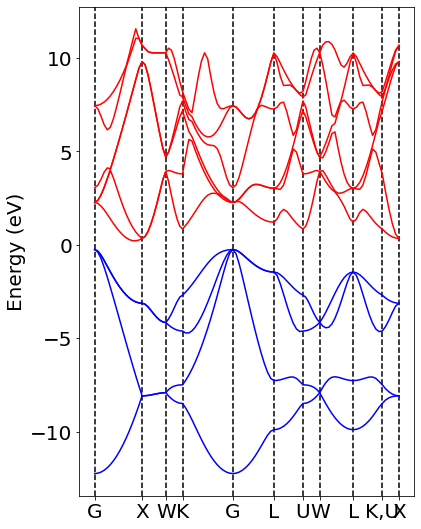

In [4]:
"""
Plot silicon band structure

NOTE The band structure data with the updated species file (second_bs.xml), where shallow core states have been
moved to the valence, gives deep bands (as expected) and some of the valance bands, but it's missing
several valence and all conduction bands. See the black overlay.
"""
import matplotlib.pyplot as plt

from excitingtools.exciting_obj_parsers import parse_band_structure_to_arrays
from excitingtools.dataclasses.band_structure import BandData

from src.parsers import get_number_of_valence_bands

band_data: BandData = parse_band_structure_to_arrays("bandstructure.xml")
vertices, labels = band_data.band_path()

ha_to_ev = 27.2114
fig, ax = plt.subplots(figsize=(6, 9))

ax.set_xticks(vertices)
ax.set_xticklabels(labels)
plt.ylabel('Energy (eV)')

# Font sizes
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', which='major', labelsize=20)

# Vertical lines at high symmetry points
for x in vertices:
    plt.axvline(x, linestyle='--', color='black')

# Find the number of valence bands, assuming Ef = 0.0
e_fermi = 0.0
n_valence = get_number_of_valence_bands(band_data, energy_zero=e_fermi)

# Colour valence and conduction bands differently
line_colour = {key:'blue' for key in range(0, n_valence)}
line_colour.update({key:'red' for key in range(n_valence, band_data.n_bands)})

for ib in range(0, band_data.n_bands):
    plt.plot(band_data.k_points, ha_to_ev * band_data.bands[:, ib], color=line_colour[ib])

save_image = False
if save_image:
      plt.savefig('si_bandstructure.jpeg', dpi=300, bbox_inches="tight")

# TODO Speak to Andris about this
# band_data2: BandData = parse_band_structure_to_arrays("second_bs.xml")
# for ib in range(0, band_data.n_bands):
#     plt.plot(band_data.k_points, ha_to_ev * band_data2.bands[:, ib], color='black', linestyle='--')